In [4]:
import pickle
from pandas.tools.plotting import *
import matplotlib 
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["font.size"] = 20
import os
import requests
import pandas as pd
#from cStringIO import StringIO
import numpy as np
import matplotlib.pyplot as pl
import scipy as spy
from scipy.stats import gamma
from scipy.optimize import minimize
import emcee
import pystan
from pystan import StanModel
import stan_utility_copy
import corner
import gc
import seaborn as sns
import h5py
import credible_interval

matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]



In [5]:
periodInsolationSwitch = 'P' #raw_input("Period or Insolation: P or I? -- ")

In [6]:
%%time
!date

''' 
with open("", "rb") as fx:
    data_dictx = pickle.load(fx)
Out_x_x_strlx_x_x_50_x_fit = data_dictx['fit']
Out_x_x_strlx_x_x_50_x_data = data_dictx['data']

alpha_x = x['alpha']
beta_x = x['beta']
lnf0_x = x['lnf0']

PyStan_flatchain_x = np.hstack((lnf0_x.reshape(-1,1), beta_x.reshape(-1,1), alpha_x.reshape(-1,1)))

koi_rps_obs_x = Out_x_data['koi_rps_obs']
koi_rps_err_ave_x = Out_x_data['koi_rps_err_ave']

la_x = Out_x_x_strlx_x_x_50_x_fit.extract(permuted=True)
#print(la5["koi_rps_true"][:,2])
rad_x = pd.DataFrame(la_x["koi_rps_true"])
#rad_x[2].plot()

def plot_x(var):
    fig, axes = pl.subplots(1, 1, figsize=(10, 5))
    fig.suptitle(var, y=0.95, fontsize='xx-large')

    rad_x[var].plot();
    pl.legend(fontsize=11)
    pl.plot([1,6000],[koi_rps_obs_x[var],koi_rps_obs_x[var]] )
    pl.plot([1,6000],[koi_rps_obs_x[var]+koi_rps_err_ave_x[var],koi_rps_obs_x[var]+koi_rps_err_ave_x[var]] )
    pl.plot([1,6000],[koi_rps_obs_x[var]-koi_rps_err_ave_x[var],koi_rps_obs_x[var]-koi_rps_err_ave_x[var]] )

    pl.tight_layout(pad=3)
    #fig_x.savefig('/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/plots/Koi_rps_true_traceplots_x'+'{}.png'.format(var))

for i in np.arange(0,len(koi_rps_obs_x),1):    
    plot_x(i);

'''


with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/outputs/Q1_16_9.1_occ_rate_3000_no_Runcs.pkl", "rb") as f2:
#with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/outputs/Q1_16_9.1_occ_rate_3000_real_Runcs_NB_cuts_50_300_0p75_2p5_RpTruncated_NO_uncs.pkl", "rb") as f2:
    data_dict2 = pickle.load(f2)
Out_Q1Q16_NO_strl1_0p75_2p5_50_300_fit = data_dict2['fit']
#Out_Q1Q16_NO_strl1_0p75_2p5_50_300_data = data_dict2['data']

alpha_Q1Q16_NO_strl1_0p75_2p5_50_300 = Out_Q1Q16_NO_strl1_0p75_2p5_50_300_fit['alpha']
beta_Q1Q16_NO_strl1_0p75_2p5_50_300 = Out_Q1Q16_NO_strl1_0p75_2p5_50_300_fit['beta']
lnf0_Q1Q16_NO_strl1_0p75_2p5_50_300 = Out_Q1Q16_NO_strl1_0p75_2p5_50_300_fit['lnf0']

PyStan_flatchain_Q1Q16_NO_strl1_0p75_2p5_50_300 = np.hstack((lnf0_Q1Q16_NO_strl1_0p75_2p5_50_300.reshape(-1,1), beta_Q1Q16_NO_strl1_0p75_2p5_50_300.reshape(-1,1), alpha_Q1Q16_NO_strl1_0p75_2p5_50_300.reshape(-1,1)))




#DR25 9.3 0.75 to 2.5 and 50 to 300 days with truncation REAL uncs and stlr rad cut at 1.15 for stlr case 1. Selected 88807 targets after cuts, Selected 118 KOIs after cuts
with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/outputs/outputs_used_6_6_18/DR25_9.3_occ_rate_3000_REAL_Runcs_origStlr1_wtruncation_0p75_2p5_50_300.pkl", "rb") as f5:
    data_dict5 = pickle.load(f5)
Out_DR25_REAL_strl1_0p75_2p5_50_300_fit = data_dict5['fit']
Out_DR25_REAL_strl1_0p75_2p5_50_300_data = data_dict5['data']

alpha_DR25_REAL_strl1_0p75_2p5_50_300 = Out_DR25_REAL_strl1_0p75_2p5_50_300_fit['alpha']
beta_DR25_REAL_strl1_0p75_2p5_50_300 = Out_DR25_REAL_strl1_0p75_2p5_50_300_fit['beta']
lnf0_DR25_REAL_strl1_0p75_2p5_50_300 = Out_DR25_REAL_strl1_0p75_2p5_50_300_fit['lnf0']

PyStan_flatchain_DR25_REAL_strl1_0p75_2p5_50_300 = np.hstack((lnf0_DR25_REAL_strl1_0p75_2p5_50_300.reshape(-1,1), beta_DR25_REAL_strl1_0p75_2p5_50_300.reshape(-1,1), alpha_DR25_REAL_strl1_0p75_2p5_50_300.reshape(-1,1)))


#DR25 9.3 0.75 to 2.5 and 50 to 300 days with truncation NO uncs and stlr rad cut at 1.15 for stlr case 1. Selected 88807 targets after cuts, Selected 118 KOIs after cuts 
with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/outputs/outputs_used_6_6_18/DR25_9.3_occ_rate_3000_NO_Runcs_origStlr1_wtruncation_0p75_2p5_50_300.pkl", "rb") as f6:
    data_dict6 = pickle.load(f6)
Out_DR25_NO_strl1_0p75_2p5_50_300_fit = data_dict6['fit']
Out_DR25_NO_strl1_0p75_2p5_50_300_data = data_dict6['data']

alpha_DR25_NO_strl1_0p75_2p5_50_300 = Out_DR25_NO_strl1_0p75_2p5_50_300_fit['alpha']
beta_DR25_NO_strl1_0p75_2p5_50_300 = Out_DR25_NO_strl1_0p75_2p5_50_300_fit['beta']
lnf0_DR25_NO_strl1_0p75_2p5_50_300 = Out_DR25_NO_strl1_0p75_2p5_50_300_fit['lnf0']

PyStan_flatchain_DR25_NO_strl1_0p75_2p5_50_300 = np.hstack((lnf0_DR25_NO_strl1_0p75_2p5_50_300.reshape(-1,1), beta_DR25_NO_strl1_0p75_2p5_50_300.reshape(-1,1), alpha_DR25_NO_strl1_0p75_2p5_50_300.reshape(-1,1)))


#DR25 9.3 1.0 to 2.0 and 50 to 200 days with truncation REAL uncs and stlr rad cut at 1.15 for stlr case 1. Selected 88807 targets after cuts, Selected 54 KOIs after cuts 
with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/outputs/outputs_used_6_6_18/DR25_9.3_occ_rate_3000_REAL_Runcs_origStlr1_wtruncation_1_2_50_200.pkl", "rb") as f7:
    data_dict7 = pickle.load(f7)
Out_DR25_REAL_strl1_1_2_50_200_fit = data_dict7['fit']
Out_DR25_REAL_strl1_1_2_50_200_data = data_dict7['data']

alpha_DR25_REAL_strl1_1_2_50_200 = Out_DR25_REAL_strl1_1_2_50_200_fit['alpha']
beta_DR25_REAL_strl1_1_2_50_200 = Out_DR25_REAL_strl1_1_2_50_200_fit['beta']
lnf0_DR25_REAL_strl1_1_2_50_200 = Out_DR25_REAL_strl1_1_2_50_200_fit['lnf0']

PyStan_flatchain_DR25_REAL_strl1_1_2_50_200 = np.hstack((lnf0_DR25_REAL_strl1_1_2_50_200.reshape(-1,1), beta_DR25_REAL_strl1_1_2_50_200.reshape(-1,1), alpha_DR25_REAL_strl1_1_2_50_200.reshape(-1,1)))


#DR25 9.3 1.0 to 2.0 and 50 to 200 days with truncation NO uncs and stlr rad cut at 1.15 for stlr case 1. Selected 88807 targets after cuts, Selected 54 KOIs after cuts 
with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/outputs/outputs_used_6_6_18/DR25_9.3_occ_rate_3000_NO_Runcs_origStlr1_wtruncation_1_2_50_200.pkl", "rb") as f8:
    data_dict8 = pickle.load(f8)
Out_DR25_NO_strl1_1_2_50_300_fit = data_dict8['fit']
Out_DR25_NO_strl1_1_2_50_300_data = data_dict8['data']

alpha_DR25_NO_strl1_1_2_50_300 = Out_DR25_NO_strl1_1_2_50_300_fit['alpha']
beta_DR25_NO_strl1_1_2_50_300 = Out_DR25_NO_strl1_1_2_50_300_fit['beta']
lnf0_DR25_NO_strl1_1_2_50_300 = Out_DR25_NO_strl1_1_2_50_300_fit['lnf0']

PyStan_flatchain_DR25_NO_strl1_1_2_50_300 = np.hstack((lnf0_DR25_NO_strl1_1_2_50_300.reshape(-1,1), beta_DR25_NO_strl1_1_2_50_300.reshape(-1,1), alpha_DR25_NO_strl1_1_2_50_300.reshape(-1,1)))


#DR25 9.3 0.75 to 2.5 and 50 to 300 days with truncation REAL uncs and  for stlr case 2. Selected 81882 targets after cuts, Selected 124 KOIs after cuts
with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/outputs/outputs_used_6_6_18/DR25_9.3_occ_rate_3000_REAL_Runcs_Stlr2_wtruncation_0p75_2p5_50_300.pkl", "rb") as f9:
    data_dict9 = pickle.load(f9)
Out_DR25_REAL_strl2_0p75_2p5_50_300_fit = data_dict9['fit']
Out_DR25_REAL_strl2_0p75_2p5_50_300_data = data_dict9['data']

alpha_DR25_REAL_strl2_0p75_2p5_50_300 = Out_DR25_REAL_strl2_0p75_2p5_50_300_fit['alpha']
beta_DR25_REAL_strl2_0p75_2p5_50_300 = Out_DR25_REAL_strl2_0p75_2p5_50_300_fit['beta']
lnf0_DR25_REAL_strl2_0p75_2p5_50_300 = Out_DR25_REAL_strl2_0p75_2p5_50_300_fit['lnf0']

PyStan_flatchain_DR25_REAL_strl2_0p75_2p5_50_300 = np.hstack((lnf0_DR25_REAL_strl2_0p75_2p5_50_300.reshape(-1,1), beta_DR25_REAL_strl2_0p75_2p5_50_300.reshape(-1,1), alpha_DR25_REAL_strl2_0p75_2p5_50_300.reshape(-1,1)))


#DR25 9.3 0.75 to 2.5 and 50 to 300 days with truncation NO uncs and  for stlr case 2. Selected 81882 targets after cuts, Selected 124 KOIs after cuts
with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/outputs/outputs_used_6_6_18/DR25_9.3_occ_rate_3000_NO_Runcs_Stlr2_wtruncation_0p75_2p5_50_300.pkl", "rb") as f10:
    data_dict10 = pickle.load(f10)
Out_DR25_NO_strl2_0p75_2p5_50_300_fit = data_dict10['fit']
Out_DR25_NO_strl2_0p75_2p5_50_300_data = data_dict10['data']

alpha_DR25_NO_strl2_0p75_2p5_50_300 = Out_DR25_NO_strl2_0p75_2p5_50_300_fit['alpha']
beta_DR25_NO_strl2_0p75_2p5_50_300 = Out_DR25_NO_strl2_0p75_2p5_50_300_fit['beta']
lnf0_DR25_NO_strl2_0p75_2p5_50_300 = Out_DR25_NO_strl2_0p75_2p5_50_300_fit['lnf0']

PyStan_flatchain_DR25_NO_strl2_0p75_2p5_50_300 = np.hstack((lnf0_DR25_NO_strl2_0p75_2p5_50_300.reshape(-1,1), beta_DR25_NO_strl2_0p75_2p5_50_300.reshape(-1,1), alpha_DR25_NO_strl2_0p75_2p5_50_300.reshape(-1,1)))


#DR25 9.3 1.0 to 2.0 and 50 to 200 days with truncation REAL uncs and  for stlr case 2. Selected 81882 targets after cuts, Selected 58 KOIs after cuts
with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/outputs/outputs_used_6_6_18/DR25_9.3_occ_rate_3000_REAL_Runcs_Stlr2_wtruncation_1_2_50_200.pkl", "rb") as f11:
    data_dict11 = pickle.load(f11)
Out_DR25_REAL_strl2_1_2_50_200_fit = data_dict11['fit']
Out_DR25_REAL_strl2_1_2_50_200_data = data_dict11['data']

alpha_DR25_REAL_strl2_1_2_50_200 = Out_DR25_REAL_strl2_1_2_50_200_fit['alpha']
beta_DR25_REAL_strl2_1_2_50_200 = Out_DR25_REAL_strl2_1_2_50_200_fit['beta']
lnf0_DR25_REAL_strl2_1_2_50_200 = Out_DR25_REAL_strl2_1_2_50_200_fit['lnf0']

PyStan_flatchain_DR25_REAL_strl2_1_2_50_200 = np.hstack((lnf0_DR25_REAL_strl2_1_2_50_200.reshape(-1,1), beta_DR25_REAL_strl2_1_2_50_200.reshape(-1,1), alpha_DR25_REAL_strl2_1_2_50_200.reshape(-1,1)))


#DR25 9.3 1.0 to 2.0 and 50 to 200 days with truncation NO uncs and  for stlr case 2.  #Selected 81882 targets after cuts, Selected 58 KOIs after cuts
with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/outputs/outputs_used_6_6_18/DR25_9.3_occ_rate_3000_NO_Runcs_Stlr2_wtruncation_1_2_50_200.pkl", "rb") as f12:
    data_dict12 = pickle.load(f12)
Out_DR25_NO_strl2_1_2_50_200_fit = data_dict12['fit']
Out_DR25_NO_strl2_1_2_50_200_data = data_dict12['data']

alpha_DR25_NO_strl2_1_2_50_200 = Out_DR25_NO_strl2_1_2_50_200_fit['alpha']
beta_DR25_NO_strl2_1_2_50_200 = Out_DR25_NO_strl2_1_2_50_200_fit['beta']
lnf0_DR25_NO_strl2_1_2_50_200 = Out_DR25_NO_strl2_1_2_50_200_fit['lnf0']

PyStan_flatchain_DR25_NO_strl2_1_2_50_200 = np.hstack((lnf0_DR25_NO_strl2_1_2_50_200.reshape(-1,1), beta_DR25_NO_strl2_1_2_50_200.reshape(-1,1), alpha_DR25_NO_strl2_1_2_50_200.reshape(-1,1)))



#DR25 9.3 + Gaia 0.75 to 2.5 and 50 to 300 days with truncation REAL uncs and for stlr case 2. 
with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Gaia_Kepler_Occ_Rates/Output/DR25_9.3_occ_rate_3000_REAL_Runcs_Gaia_stlr_Gaia_rorUnc_Rp_0p75_2p5_50_300_w_truncation.pkl", "rb") as f13:
    data_dict13 = pickle.load(f13)
Out_DR25_Gaia_REAL_strl2_0p75_2p5_50_300_fit = data_dict13['fit']
Out_DR25_Gaia_REAL_strl2_0p75_2p5_50_300_data = data_dict13['data']

alpha_DR25_Gaia_REAL_strl2_0p75_2p5_50_300 = Out_DR25_Gaia_REAL_strl2_0p75_2p5_50_300_fit['alpha']
beta_DR25_Gaia_REAL_strl2_0p75_2p5_50_300 = Out_DR25_Gaia_REAL_strl2_0p75_2p5_50_300_fit['beta']
lnf0_DR25_Gaia_REAL_strl2_0p75_2p5_50_300 = Out_DR25_Gaia_REAL_strl2_0p75_2p5_50_300_fit['lnf0']

PyStan_flatchain_DR25_Gaia_REAL_strl2_0p75_2p5_50_300 = np.hstack((lnf0_DR25_Gaia_REAL_strl2_0p75_2p5_50_300.reshape(-1,1), beta_DR25_Gaia_REAL_strl2_0p75_2p5_50_300.reshape(-1,1), alpha_DR25_Gaia_REAL_strl2_0p75_2p5_50_300.reshape(-1,1)))

#DR25 9.3 + Gaia 0.75 to 2.5 and 50 to 300 days with truncation REAL RP uncs and for stlr case 2.
with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Gaia_Kepler_Occ_Rates/Output/DR25_9.3_occ_rate_3000_real_Runcs_Gaia_stlr_yes_Prad_update_0p75_2p5_50_300_w_truncation.pkl", "rb") as f14:
    data_dict14 = pickle.load(f14)
Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_fit = data_dict14['fit']
Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_data = data_dict14['data']

alpha_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300 = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_fit['alpha']
beta_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300 = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_fit['beta']
lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300 = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_fit['lnf0']

PyStan_flatchain_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300 = np.hstack((lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300.reshape(-1,1), beta_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300.reshape(-1,1), alpha_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300.reshape(-1,1)))

#DR25 9.3 + Gaia 0.75 to 2.5 and 50 to 300 days with truncation NO uncs and for stlr case 2.  
with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Gaia_Kepler_Occ_Rates/Output/DR25_9.3_occ_rate_3000_NO_Runcs_Gaia_stlr_yes_Prad_update_0p75_2p5_50_300_w_truncation.pkl", "rb") as f15:
    data_dict15 = pickle.load(f15)
Out_DR25_Gaia_NO_strl2_0p75_2p5_50_300_fit = data_dict15['fit']
Out_DR25_Gaia_NO_strl2_0p75_2p5_50_300_data = data_dict15['data']

alpha_DR25_Gaia_NO_strl2_0p75_2p5_50_300 = Out_DR25_Gaia_NO_strl2_0p75_2p5_50_300_fit['alpha']
beta_DR25_Gaia_NO_strl2_0p75_2p5_50_300 = Out_DR25_Gaia_NO_strl2_0p75_2p5_50_300_fit['beta']
lnf0_DR25_Gaia_NO_strl2_0p75_2p5_50_300 = Out_DR25_Gaia_NO_strl2_0p75_2p5_50_300_fit['lnf0']

PyStan_flatchain_DR25_Gaia_NO_strl2_0p75_2p5_50_300 = np.hstack((lnf0_DR25_Gaia_NO_strl2_0p75_2p5_50_300.reshape(-1,1), beta_DR25_Gaia_NO_strl2_0p75_2p5_50_300.reshape(-1,1), alpha_DR25_Gaia_NO_strl2_0p75_2p5_50_300.reshape(-1,1)))



###DR25 9.3 0.75 to 2.5 and 50 to 300 days with truncation NO uncs and  for stlr case 2 higher res
with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/outputs/outputs_used_6_6_18/DR25_9.3_occ_rate_3000_NO_Runcs_Stlr2_wtruncation_0p75_2p5_50_300_highres.pkl", "rb") as f16:
    data_dict16 = pickle.load(f16)
Out_DR25_NO_strl2_0p75_2p5_50_300_hires_fit = data_dict16['fit']
Out_DR25_NO_strl2_0p75_2p5_50_300_hires_data = data_dict16['data']

alpha_DR25_NO_strl2_0p75_2p5_50_300_hires = Out_DR25_NO_strl2_0p75_2p5_50_300_hires_fit['alpha']
beta_DR25_NO_strl2_0p75_2p5_50_300_hires = Out_DR25_NO_strl2_0p75_2p5_50_300_hires_fit['beta']
lnf0_DR25_NO_strl2_0p75_2p5_50_300_hires = Out_DR25_NO_strl2_0p75_2p5_50_300_hires_fit['lnf0']

PyStan_flatchain_DR25_NO_strl2_0p75_2p5_50_300_hires = np.hstack((lnf0_DR25_NO_strl2_0p75_2p5_50_300_hires.reshape(-1,1), beta_DR25_NO_strl2_0p75_2p5_50_300_hires.reshape(-1,1), alpha_DR25_NO_strl2_0p75_2p5_50_300_hires.reshape(-1,1)))


with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/outputs/outputs_used_6_6_18/DR25_9.3_occ_rate_3000_NO_Runcs_Stlr2_wtruncation_0p75_2p5_50_300_highres_PorbandRp.pkl", "rb") as f17:
    data_dict17 = pickle.load(f17)
Out_DR25_NO_strl2_0p75_2p5_50_300_hires_PorbandRp_fit = data_dict17['fit']
Out_DR25_NO_strl2_0p75_2p5_50_300_hires_PorbandRp_data = data_dict17['data']

alpha_DR25_NO_strl2_0p75_2p5_50_300_hires_PorbandRp = Out_DR25_NO_strl2_0p75_2p5_50_300_hires_PorbandRp_fit['alpha']
beta_DR25_NO_strl2_0p75_2p5_50_300_hires_PorbandRp = Out_DR25_NO_strl2_0p75_2p5_50_300_hires_PorbandRp_fit['beta']
lnf0_DR25_NO_strl2_0p75_2p5_50_300_hires_PorbandRp = Out_DR25_NO_strl2_0p75_2p5_50_300_hires_PorbandRp_fit['lnf0']

PyStan_flatchain_DR25_NO_strl2_0p75_2p5_50_300_hires_PorbandRp = np.hstack((lnf0_DR25_NO_strl2_0p75_2p5_50_300_hires_PorbandRp.reshape(-1,1), beta_DR25_NO_strl2_0p75_2p5_50_300_hires_PorbandRp.reshape(-1,1), alpha_DR25_NO_strl2_0p75_2p5_50_300_hires_PorbandRp.reshape(-1,1)))


with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Stan_Kepler_Populations/outputs/outputs_used_6_6_18/DR25_9.3_occ_rate_3000_REAL_Runcs_Stlr2_wtruncation_0p75_2p5_50_300_hires_Porb_andRp.pkl", "rb") as f18:
    data_dict18 = pickle.load(f18)
Out_DR25_REAL_strl2_0p75_2p5_50_300_hires_PorbandRp_fit = data_dict18['fit']
Out_DR25_REAL_strl2_0p75_2p5_50_300_hires_PorbandRp_data = data_dict18['data']

alpha_DR25_REAL_strl2_0p75_2p5_50_300_hires_PorbandRp = Out_DR25_REAL_strl2_0p75_2p5_50_300_hires_PorbandRp_fit['alpha']
beta_DR25_REAL_strl2_0p75_2p5_50_300_hires_PorbandRp = Out_DR25_REAL_strl2_0p75_2p5_50_300_hires_PorbandRp_fit['beta']
lnf0_DR25_REAL_strl2_0p75_2p5_50_300_hires_PorbandRp = Out_DR25_REAL_strl2_0p75_2p5_50_300_hires_PorbandRp_fit['lnf0']

PyStan_flatchain_DR25_REAL_strl2_0p75_2p5_50_300_hires_PorbandRp = np.hstack((lnf0_DR25_REAL_strl2_0p75_2p5_50_300_hires_PorbandRp.reshape(-1,1), beta_DR25_REAL_strl2_0p75_2p5_50_300_hires_PorbandRp.reshape(-1,1), alpha_DR25_REAL_strl2_0p75_2p5_50_300_hires_PorbandRp.reshape(-1,1)))


with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Gaia_Kepler_Occ_Rates/Output/DR25_9.3_occ_rate_3000_REAL_Runcs_Gaia_stlr_yes_Prad_update_0p75_2p5_50_300_w_truncation_Berger_Huber.pkl", "rb") as f19:
    data_dict19 = pickle.load(f19)
Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_fit = data_dict19['fit']
Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_data = data_dict19['data']

alpha_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_fit['alpha']
beta_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_fit['beta']
lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_fit['lnf0']

PyStan_flatchain_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber = np.hstack((lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber.reshape(-1,1), beta_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber.reshape(-1,1), alpha_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber.reshape(-1,1)))

with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Gaia_Kepler_Occ_Rates/Output/DR25_9.3_occ_rate_3000_REAL_Runcs_Gaia_stlr_yes_Prad_update_0p75_2p5_50_300_w_truncation_Berger_Huber_rematched.pkl", "rb") as f20:
    data_dict20 = pickle.load(f20)
Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fit = data_dict20['fit']
Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_data = data_dict20['data']

alpha_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fit['alpha']
beta_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fit['beta']
lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fit['lnf0']

PyStan_flatchain_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched = np.hstack((lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched.reshape(-1,1), beta_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched.reshape(-1,1), alpha_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched.reshape(-1,1)))

with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Gaia_Kepler_Occ_Rates/Output/DR25_9.3_occ_rate_3000_REAL_Runcs_Gaia_stlr_yes_Prad_update_0p75_2p5_50_300_w_truncation_Berger_Huber_and_Custom.pkl", "rb") as f21:
    data_dict21 = pickle.load(f21)
Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_and_Custom_fit = data_dict21['fit']
Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_and_Custom_data = data_dict21['data']

alpha_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_and_Custom = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_and_Custom_fit['alpha']
beta_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_and_Custom = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_and_Custom_fit['beta']
lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_and_Custom = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_and_Custom_fit['lnf0']

PyStan_flatchain_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_and_Custom = np.hstack((lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_and_Custom.reshape(-1,1), beta_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_and_Custom.reshape(-1,1), alpha_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_and_Custom.reshape(-1,1)))

with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Gaia_Kepler_Occ_Rates/Output/DR25_9.3_occ_rate_3000_REAL_Runcs_Gaia_stlr_yes_Prad_update_0p75_2p5_50_300_w_truncation_Berger_Huber_rematched_fixed_truncation.pkl", "rb") as f21:
    data_dict21 = pickle.load(f21)
Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation_fit = data_dict21['fit']
Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched__fixed_truncationdata = data_dict21['data']

alpha_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation_fit['alpha']
beta_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation_fit['beta']
lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation_fit['lnf0']

PyStan_flatchain_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation = np.hstack((lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation.reshape(-1,1), beta_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation.reshape(-1,1), alpha_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation.reshape(-1,1)))

with open("/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Gaia_Kepler_Occ_Rates/Output/DR25_9.3_occ_rate_3000_REAL_Runcs_Gaia_stlr_yes_Prad_update_0p75_2p5_50_300_w_truncation_Berger_Huber_rematched_fixed_truncation_Rp_True_is_constrained.pkl", "rb") as f22:
    data_dict22 = pickle.load(f22)
Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation_Rp_True_is_constrained_fit = data_dict22['fit']
Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched__fixed_truncation_Rp_True_is_constrained_data = data_dict22['data']

alpha_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation_Rp_True_is_constrained = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation_Rp_True_is_constrained_fit['alpha']
beta_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation_Rp_True_is_constrained = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation_Rp_True_is_constrained_fit['beta']
lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation_Rp_True_is_constrained = Out_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation_Rp_True_is_constrained_fit['lnf0']

PyStan_flatchain_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation_Rp_True_is_constrained = np.hstack((lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation_Rp_True_is_constrained.reshape(-1,1), beta_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation_Rp_True_is_constrained.reshape(-1,1), alpha_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation_Rp_True_is_constrained.reshape(-1,1)))





!date

Mon Jun  3 17:33:22 PDT 2019


/Users/meganshabram/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Mon Jun  3 17:33:23 PDT 2019
CPU times: user 364 ms, sys: 245 ms, total: 608 ms
Wall time: 937 ms


lnf0_Q1Q16_NO_strl1_0p75_2p5_50_300
lnf0_DR25_Gaia_REAL_strl1_0p75_2p5_50_300
lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300
lnf0_DR25_Gaia_NO_strl2_0p75_2p5_50_300

In [7]:
fileIn = "/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Gaia_Kepler_Occ_Rates/Data/occur_alt_50P300_0p75R2p5_Burke_2018.hd5"
f = h5py.File(fileIn,'r')
vals = np.array(f['values'])
Burke_2018_DR25_0p75_2p5_50_300 = vals

print(len(Burke_2018_DR25_0p75_2p5_50_300))

10000


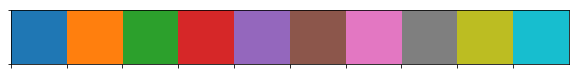

In [5]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

/Users/meganshabram/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


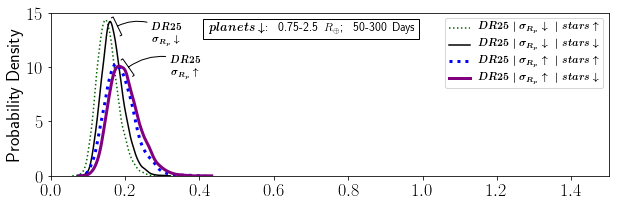

In [55]:

#FIGURE 1a




#Reorder key and produce results slides for figure.   
fig_15 = pl.figure()
pl.rcParams["figure.figsize"] = (10,3)

#pl.hist(np.exp(lnf0_DR25_NO_strl1_1_2_50_300), normed=True, bins=50, alpha=0.1, color='darkgreen')
#pl.hist(np.exp(lnf0_DR25_NO_strl2_1_2_50_200), normed=True, bins=50, alpha=0.1, color='black')
#pl.hist(np.exp(lnf0_DR25_REAL_strl1_1_2_50_200), normed=True, bins=50, alpha=0.1, color='blue')
#pl.hist(np.exp(lnf0_DR25_REAL_strl2_1_2_50_200), normed=True, bins=50, alpha=0.1, color='purple')

sns.kdeplot(np.exp(lnf0_DR25_NO_strl1_1_2_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow}$', color='darkgreen',ls=':')
sns.kdeplot(np.exp(lnf0_DR25_NO_strl2_1_2_50_200), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\downarrow\;|\; stars\downarrow}$', color='black')
sns.kdeplot(np.exp(lnf0_DR25_REAL_strl1_1_2_50_200), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  stars\uparrow}$', color='blue',ls=':', linewidth=3)
sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_1_2_50_200), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow}$', color='purple', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_NO_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\; planets\uparrow}$', color='darkorange',ls=':')
#sns.kdeplot(np.exp(lnf0_DR25_NO_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\downarrow\;|\; planets\uparrow}$', color='magenta')
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{DR25 \;|\; \sigma_{R_{p}}\uparrow \;|\; stars\uparrow \;|\; planets\uparrow}$', color='red',ls=':', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow\;|\;  planets\uparrow}$', color='cyan', linewidth=3)

#sns.kdeplot(np.exp(lnf0_DR25_Gaia_NO_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}}\downarrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='brown')
#sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}} w/\star\uparrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='mediumseagreen', linewidth=3)
#sns.kdeplot(np.exp(lnf0_Q1Q16_NO_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{Q1-Q16\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\; planets\uparrow}$', color='dimgrey',ls=':')


#sns.kdeplot(Burke_2018_DR25_0p75_2p5_50_300, label=r'$\boldsymbol{Burke \, 2018\,  DR25\;|\; stars\downarrow\;|\; planets\uparrow}$', color='black')
#sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  Gaia stars\downarrow\;|\; planets\uparrow}$', color='darkkhaki')

#pl.xlabel(r"\begin{center} Marginal Posterior of $F_{0}$ \\ (i.e., occurrence rate or number of planets per GK star) \end{center}", fontsize=18)    
pl.ylabel(r"Probability Density", fontsize=18)    
pl.legend(fontsize=10.5)
pl.tick_params(labelsize=18)
#pl.tick_params(axis='y',labelleft='off')
#pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.ylim([0, 15])
pl.xlim([0.0, 1.5])

ax = pl.subplot(111)
ann1 = ax.annotate(r"\begin{center} $\boldsymbol{DR25}$ \\ $\boldsymbol{\sigma_{R_{p}}\downarrow}$ \end{center}",
                  xy=(0.175, 13.7), xycoords='data',
                  xytext=(0.31, 13.), textcoords='data',
                  size=10, va="center", ha="center",
                  arrowprops=dict(arrowstyle="-[",
                                  connectionstyle="arc3,rad=0.2",
                                  relpos=(0., 1.),
                                  fc="w"), 
                  )
ann2 = ax.annotate(r"\begin{center} $\boldsymbol{DR25}$ \\ $\boldsymbol{\sigma_{R_{p}}\uparrow}$ \end{center}",
                  xy=(0.205, 9.9), xycoords='data',
                  xytext=(0.36, 9.9), textcoords='data',
                  size=10, va="center", ha="center",
                  arrowprops=dict(arrowstyle="-[",
                                  connectionstyle="arc3,rad=0.2",
                                  relpos=(0., 1.),
                                  fc="w"), 
                  )
propsb = dict(boxstyle='square,pad=0.4', facecolor='none')

ann3 = ax.annotate(r"\begin{center}$\boldsymbol{planets\downarrow}:$ \, 0.75-2.5\, $R_{\oplus}$; \, 50-300\, Days \end{center}",
                  xy=(0.7, 14), xycoords='data',
                  xytext=(0.7, 13.5), textcoords='data',
                  size=12, va="center", ha="center",
                  bbox=propsb
                  )

#ann10 = ax.annotate('',
#                  xy=(0.2, .65), xycoords='data',
#                  xytext=(1.25, .65), textcoords='data',
#                  size=10, va="center", ha="center",
#                  arrowprops=dict(arrowstyle="|-|,widthA=0.25,widthB=.25",
#                                  fc="w"), 
#                    )
#ann11 = ax.annotate('',
#                  xy=(0.06, 8.), xycoords='data',
#                  xytext=(.33, 8.), textcoords='data',
#                  size=10, va="center", ha="center",
#                  arrowprops=dict(arrowstyle="|-|,widthA=0.25,widthB=.25",
#                                  fc="w"), 
#                    )

#props2 = dict(boxstyle='square', facecolor='white')

#textstr1 = r"\begin{center} $\boldsymbol{planets\downarrow}$ \end{center}"
#ann8 = ax.text(0.07, 0.545, textstr1, transform=ax.transAxes, fontsize=9,
#        verticalalignment='top', bbox=props2)

#textstr2 = r"\begin{center} $\boldsymbol{planets\uparrow}$ \end{center}"
#ann9 = ax.text(0.227, 0.055, textstr2, transform=ax.transAxes, fontsize=9,
#        verticalalignment='top', bbox=props2)

fig_15.savefig('/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Gaia_Kepler_Occ_Rates/plots/plots_june_6_2018/Occ_Rate_kdeplot_DR25_strl2_and_stlr2BurkeCustom_0p75_2p5_50_300_ALL_re_ordered_key_final_no_Burke_re_colored_1A.pdf',bbox_inches='tight')


/Users/meganshabram/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


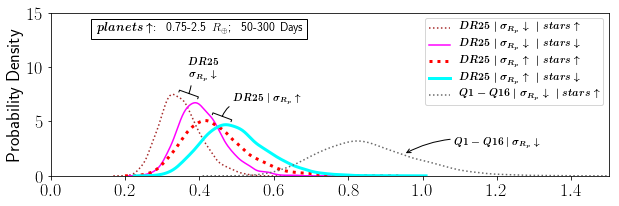

In [52]:

# FIGURE 1b


#Reorder key and produce results slides for figure.   
fig_15 = pl.figure()
pl.rcParams["figure.figsize"] = (10,3)

#sns.kdeplot(np.exp(lnf0_DR25_NO_strl1_1_2_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\;planets\downarrow}$', color='darkgreen',ls=':')
#sns.kdeplot(np.exp(lnf0_DR25_NO_strl2_1_2_50_200), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\downarrow\;|\; stars\downarrow\;|\; planets\downarrow}$', color='black')
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl1_1_2_50_200), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  stars\uparrow\;|\;  planets\downarrow}$', color='blue',ls=':', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_1_2_50_200), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow\;|\; planets\downarrow}$', color='purple', linewidth=3)

#pl.hist(np.exp(lnf0_DR25_NO_strl1_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='darkorange')
#pl.hist(np.exp(lnf0_DR25_NO_strl2_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='magenta')
#pl.hist(np.exp(lnf0_DR25_REAL_strl1_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='red')
#pl.hist(np.exp(lnf0_DR25_REAL_strl2_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='cyan')

#pl.hist(np.exp(lnf0_Q1Q16_NO_strl1_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='dimgrey')


sns.kdeplot(np.exp(lnf0_DR25_NO_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow}$', color='brown',ls=':')
sns.kdeplot(np.exp(lnf0_DR25_NO_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\downarrow}$', color='magenta')
sns.kdeplot(np.exp(lnf0_DR25_REAL_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{DR25 \;|\; \sigma_{R_{p}}\uparrow \;|\; stars\uparrow}$', color='red',ls=':', linewidth=3)
sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow}$', color='cyan', linewidth=3)


#sns.kdeplot(np.exp(lnf0_DR25_Gaia_NO_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}}\downarrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='brown')
#sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}} w/\star\uparrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='mediumseagreen', linewidth=3)

sns.kdeplot(np.exp(lnf0_Q1Q16_NO_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{Q1-Q16\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow}$', color='dimgrey',ls=':')


#sns.kdeplot(Burke_2018_DR25_0p75_2p5_50_300, label=r'$\boldsymbol{Burke \, 2018\,  DR25\;|\; stars\downarrow\;|\; planets\uparrow}$', color='black')
#sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  Gaia stars\downarrow\;|\; planets\uparrow}$', color='darkkhaki')

#pl.xlabel(r"\begin{center} Marginal Posterior of $F_{0}$ \\ (i.e., occurrence rate or number of planets per GK star) \end{center}", fontsize=18)    
pl.ylabel(r"Probability Density", fontsize=18)    
pl.legend(fontsize=10.5)
pl.tick_params(labelsize=18)
#pl.tick_params(axis='y',labelleft='off')
#pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.ylim([0, 15])
pl.xlim([0.0, 1.5])

ax = pl.subplot(111)
                  
ann3 = ax.annotate(r"\begin{center} $\boldsymbol{DR25}$ \\ $\boldsymbol{\sigma_{R_{p}}\downarrow}$ \end{center}",
                  xy=(0.37, 7.4), xycoords='data',
                  xytext=(0.41, 9.7), textcoords='data',
                  size=10, va="center", ha="center",
                  arrowprops=dict(arrowstyle="-[",
                                  connectionstyle="arc3,rad=-0.2",
                                  relpos=(0., 1.),
                                  fc="w"), 
                  )
ann4 = ax.annotate(r"\begin{center} $\boldsymbol{DR25}$ $\boldsymbol{|}$ $\boldsymbol{\sigma_{R_{p}}\uparrow}$ \end{center}",
                  xy=(0.46, 5.3), xycoords='data',
                  xytext=(0.58, 7.1), textcoords='data',
                  size=10, va="center", ha="center",
                  arrowprops=dict(arrowstyle="-[",
                                  connectionstyle="arc3,rad=0.2",
                                  relpos=(0., 0.),
                                  fc="w"), 
                  )

props1 = dict(boxstyle='round,pad=0.4', facecolor='cornsilk')

                  

ann7 = ax.annotate(r"\begin{center} $\boldsymbol{Q1-Q16\;|\;  \sigma_{R_{p}}\downarrow}$ \end{center}",
                  xy=(.95, 2.), xycoords='data',
                  xytext=(1.2, 3), textcoords='data',
                  size=10, va="center", ha="center",
                  arrowprops=dict(arrowstyle="->",
                                  connectionstyle="arc3,rad=0.2",
                                  fc="w"), 
                  )

propsb = dict(boxstyle='square,pad=0.4', facecolor='none')

ann3 = ax.annotate(r"\begin{center}$\boldsymbol{planets\uparrow}:$ \, 0.75-2.5\, $R_{\oplus}$; \, 50-300\, Days \end{center}",
                  xy=(0.4, 14), xycoords='data',
                  xytext=(0.4, 13.5), textcoords='data',
                  size=12, va="center", ha="center",
                  bbox=propsb
                  )

fig_15.savefig('/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Gaia_Kepler_Occ_Rates/plots/plots_june_6_2018/Occ_Rate_kdeplot_DR25_strl2_and_stlr2BurkeCustom_0p75_2p5_50_300_ALL_re_ordered_key_final_no_Burke_re_colored_1B.pdf',bbox_inches='tight')


/Users/meganshabram/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


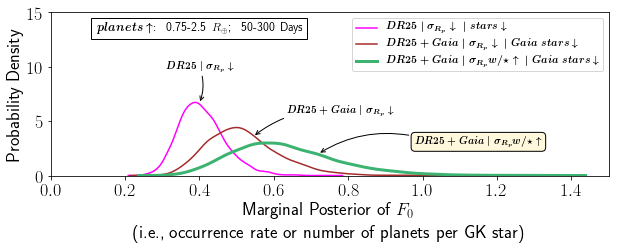

In [54]:
#FIGURE 2


#Reorder key and produce results slides for figure.   
fig_15 = pl.figure()
pl.rcParams["figure.figsize"] = (10,3)

#sns.kdeplot(np.exp(lnf0_DR25_NO_strl1_1_2_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\;planets\downarrow}$', color='darkgreen',ls=':')
#sns.kdeplot(np.exp(lnf0_DR25_NO_strl2_1_2_50_200), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\downarrow\;|\; stars\downarrow\;|\; planets\downarrow}$', color='black')
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl1_1_2_50_200), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  stars\uparrow\;|\;  planets\downarrow}$', color='blue',ls=':', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_1_2_50_200), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow\;|\; planets\downarrow}$', color='purple', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_NO_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\; planets\uparrow}$', color='darkorange',ls=':')

#pl.hist(np.exp(lnf0_DR25_NO_strl2_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='magenta')

#pl.hist(np.exp(lnf0_DR25_Gaia_NO_strl2_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='brown')
#pl.hist(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='mediumseagreen')


sns.kdeplot(np.exp(lnf0_DR25_NO_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\downarrow}$', color='magenta')
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{DR25 \;|\; \sigma_{R_{p}}\uparrow \;|\; stars\uparrow \;|\; planets\uparrow}$', color='red',ls=':', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow\;|\;  planets\uparrow}$', color='cyan', linewidth=3)
sns.kdeplot(np.exp(lnf0_DR25_Gaia_NO_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}}\downarrow\;|\;  Gaia \;stars\downarrow}$', color='brown')
sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}} w/\star\uparrow\;|\;  Gaia \;stars\downarrow}$', color='mediumseagreen', linewidth=3)
#sns.kdeplot(np.exp(lnf0_Q1Q16_NO_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{Q1-Q16\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\; planets\uparrow}$', color='dimgrey',ls=':')


#sns.kdeplot(Burke_2018_DR25_0p75_2p5_50_300, label=r'$\boldsymbol{Burke \, 2018\,  DR25\;|\; stars\downarrow\;|\; planets\uparrow}$', color='black')
#sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  Gaia stars\downarrow\;|\; planets\uparrow}$', color='darkkhaki')

pl.xlabel(r"\begin{center} Marginal Posterior of $F_{0}$ \\ (i.e., occurrence rate or number of planets per GK star) \end{center}", fontsize=18)    
pl.ylabel(r"Probability Density", fontsize=18)    
pl.legend(fontsize=10.5)
pl.tick_params(labelsize=18)
#pl.tick_params(axis='y',labelleft='off')
#pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.ylim([0, 15])
pl.xlim([0,1.5])
ax = pl.subplot(111)
ann4 = ax.annotate(r"\begin{center} $\boldsymbol{DR25}$ $\boldsymbol{|}$ $\boldsymbol{\sigma_{R_{p}}\downarrow}$ \end{center}",
                  xy=(0.4, 6.65), xycoords='data',
                  xytext=(0.4, 10.), textcoords='data',
                  size=10, va="center", ha="center",
                  arrowprops=dict(arrowstyle="->",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"), 
                  )
ann5 = ax.annotate(r"\begin{center} $\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}}\downarrow}$ \end{center}",
                  xy=(0.545, 3.6), xycoords='data',
                  xytext=(0.78, 6), textcoords='data',
                  size=10, va="center", ha="center",
                  arrowprops=dict(arrowstyle="->",
                                  connectionstyle="arc3,rad=0.2",
                                  fc="w"), 
                  )

props1 = dict(boxstyle='round,pad=0.4', facecolor='cornsilk')

ann6 = ax.annotate(r"\begin{center} $\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}} w/\star\uparrow}$ \end{center}",
                  xy=(0.72, 2.), xycoords='data',
                  xytext=(1.15, 3.6), textcoords='data',
                  size=10, va="top", ha="center",
                  bbox=props1,
                  arrowprops=dict(arrowstyle="->",
                                  connectionstyle="arc3,rad=0.2",
                                  relpos=(0., 1.),
                                  fc="w"), 
                  )

propsb = dict(boxstyle='square,pad=0.4', facecolor='none')

ann3 = ax.annotate(r"\begin{center}$\boldsymbol{planets\uparrow}:$ \, 0.75-2.5\, $R_{\oplus}$; \, 50-300\, Days \end{center}",
                  xy=(0.4, 14), xycoords='data',
                  xytext=(0.4, 13.5), textcoords='data',
                  size=12, va="center", ha="center",
                  bbox=propsb
                  )

fig_15.savefig('/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Gaia_Kepler_Occ_Rates/plots/plots_june_6_2018/Occ_Rate_kdeplot_DR25_strl2_and_stlr2BurkeCustom_0p75_2p5_50_300_ALL_re_ordered_key_final_no_Burke_re_colored_1C.pdf',bbox_inches='tight')


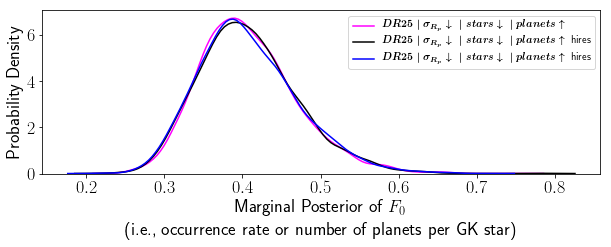

In [15]:
   
fig_hires = pl.figure()
pl.rcParams["figure.figsize"] = (10,3)

#sns.kdeplot(np.exp(lnf0_DR25_NO_strl1_1_2_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\;planets\downarrow}$', color='darkgreen',ls=':')
#sns.kdeplot(np.exp(lnf0_DR25_NO_strl2_1_2_50_200), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\downarrow\;|\; stars\downarrow\;|\; planets\downarrow}$', color='black')
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl1_1_2_50_200), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  stars\uparrow\;|\;  planets\downarrow}$', color='blue',ls=':', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_1_2_50_200), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow\;|\; planets\downarrow}$', color='purple', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_NO_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\; planets\uparrow}$', color='darkorange',ls=':')

#pl.hist(np.exp(lnf0_DR25_NO_strl2_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='magenta')

#pl.hist(np.exp(lnf0_DR25_Gaia_NO_strl2_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='brown')
#pl.hist(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='mediumseagreen')


sns.kdeplot(np.exp(lnf0_DR25_NO_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\downarrow\;|\; planets\uparrow}$', color='magenta')
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{DR25 \;|\; \sigma_{R_{p}}\uparrow \;|\; stars\uparrow \;|\; planets\uparrow}$', color='red',ls=':', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow\;|\;  planets\uparrow}$', color='cyan', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_Gaia_NO_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}}\downarrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='brown')
#sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}} w/\star\uparrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='mediumseagreen', linewidth=3)
#sns.kdeplot(np.exp(lnf0_Q1Q16_NO_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{Q1-Q16\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\; planets\uparrow}$', color='dimgrey',ls=':')


#sns.kdeplot(Burke_2018_DR25_0p75_2p5_50_300, label=r'$\boldsymbol{Burke \, 2018\,  DR25\;|\; stars\downarrow\;|\; planets\uparrow}$', color='black')
#sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  Gaia stars\downarrow\;|\; planets\uparrow}$', color='darkkhaki')

sns.kdeplot(np.exp(lnf0_DR25_NO_strl2_0p75_2p5_50_300_hires), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\downarrow\;|\; planets\uparrow}$ \,hires', color='black')
sns.kdeplot(np.exp(lnf0_DR25_NO_strl2_0p75_2p5_50_300_hires_PorbandRp), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\downarrow\;|\; planets\uparrow}$ \,hires', color='blue')


pl.xlabel(r"\begin{center} Marginal Posterior of $F_{0}$ \\ (i.e., occurrence rate or number of planets per GK star) \end{center}", fontsize=18)    
pl.ylabel(r"Probability Density", fontsize=18)    
pl.legend(fontsize=10.5)
pl.tick_params(labelsize=18)
#pl.tick_params(axis='y',labelleft='off')
#pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#pl.ylim([0, 15])
#pl.xlim([0,1.5])





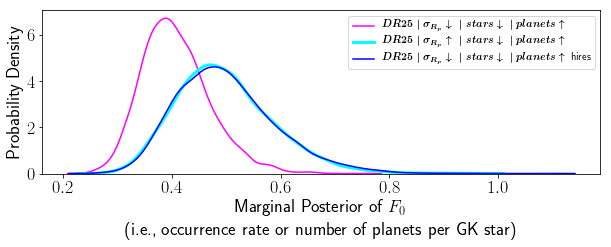

In [20]:
fig_hires = pl.figure()
pl.rcParams["figure.figsize"] = (10,3)

#sns.kdeplot(np.exp(lnf0_DR25_NO_strl1_1_2_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\;planets\downarrow}$', color='darkgreen',ls=':')
#sns.kdeplot(np.exp(lnf0_DR25_NO_strl2_1_2_50_200), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\downarrow\;|\; stars\downarrow\;|\; planets\downarrow}$', color='black')
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl1_1_2_50_200), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  stars\uparrow\;|\;  planets\downarrow}$', color='blue',ls=':', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_1_2_50_200), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow\;|\; planets\downarrow}$', color='purple', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_NO_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\; planets\uparrow}$', color='darkorange',ls=':')

#pl.hist(np.exp(lnf0_DR25_NO_strl2_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='magenta')

#pl.hist(np.exp(lnf0_DR25_Gaia_NO_strl2_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='brown')
#pl.hist(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='mediumseagreen')


sns.kdeplot(np.exp(lnf0_DR25_NO_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\downarrow\;|\; planets\uparrow}$', color='magenta')
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{DR25 \;|\; \sigma_{R_{p}}\uparrow \;|\; stars\uparrow \;|\; planets\uparrow}$', color='red',ls=':', linewidth=3)
sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow\;|\;  planets\uparrow}$', color='cyan', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_Gaia_NO_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}}\downarrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='brown')
#sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}} w/\star\uparrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='mediumseagreen', linewidth=3)
#sns.kdeplot(np.exp(lnf0_Q1Q16_NO_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{Q1-Q16\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\; planets\uparrow}$', color='dimgrey',ls=':')


#sns.kdeplot(Burke_2018_DR25_0p75_2p5_50_300, label=r'$\boldsymbol{Burke \, 2018\,  DR25\;|\; stars\downarrow\;|\; planets\uparrow}$', color='black')
#sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  Gaia stars\downarrow\;|\; planets\uparrow}$', color='darkkhaki')

sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_0p75_2p5_50_300_hires_PorbandRp), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\downarrow\;|\; planets\uparrow}$ \,hires', color='blue')


pl.xlabel(r"\begin{center} Marginal Posterior of $F_{0}$ \\ (i.e., occurrence rate or number of planets per GK star) \end{center}", fontsize=18)    
pl.ylabel(r"Probability Density", fontsize=18)    
pl.legend(fontsize=10.5)
pl.tick_params(labelsize=18)
#pl.tick_params(axis='y',labelleft='off')
#pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#pl.ylim([0, 15])
#pl.xlim([0,1.5])





/Users/meganshabram/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


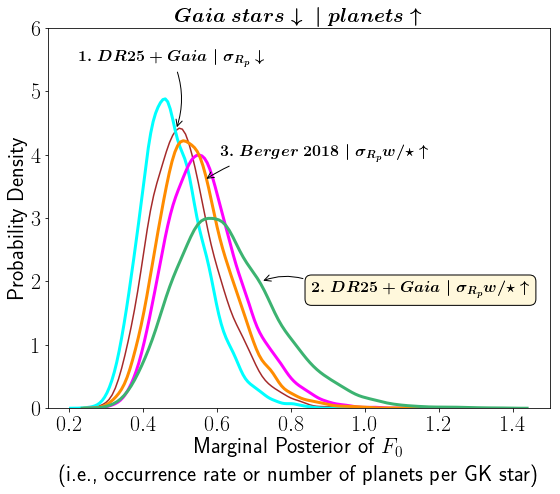

In [297]:
#GAIA with Berger and Huber catalog as well and Hsu and Ford. 


#Reorder key and produce results slides for figure.   
fig_GaiaBerger = pl.figure()
pl.rcParams["figure.figsize"] = (9,7)

#sns.kdeplot(np.exp(lnf0_DR25_NO_strl1_1_2_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\;planets\downarrow}$', color='darkgreen',ls=':')
#sns.kdeplot(np.exp(lnf0_DR25_NO_strl2_1_2_50_200), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\downarrow\;|\; stars\downarrow\;|\; planets\downarrow}$', color='black')
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl1_1_2_50_200), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  stars\uparrow\;|\;  planets\downarrow}$', color='blue',ls=':', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_1_2_50_200), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow\;|\; planets\downarrow}$', color='purple', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_NO_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\; planets\uparrow}$', color='darkorange',ls=':')

#pl.hist(np.exp(lnf0_DR25_NO_strl2_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='magenta')

#pl.hist(np.exp(lnf0_DR25_Gaia_NO_strl2_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='brown')
#pl.hist(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='mediumseagreen')


#sns.kdeplot(np.exp(lnf0_DR25_NO_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\downarrow\;|\; planets\uparrow}$', color='magenta')

#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_0p75_2p5_50_300_hires_PorbandRp), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow\;|\; planets\uparrow}$ \,hires', color='lightblue', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow\;|\; planets\uparrow}$', color='cyan', linewidth=3)

#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{DR25 \;|\; \sigma_{R_{p}}\uparrow \;|\; stars\uparrow \;|\; planets\uparrow}$', color='red',ls=':', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow\;|\;  planets\uparrow}$', color='cyan', linewidth=3)
sns.kdeplot(np.exp(lnf0_DR25_Gaia_NO_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}}\downarrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='brown')

sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation), label=r'$\boldsymbol{Berger\;2018\;|\;  \sigma_{R_{p}} w/\star\uparrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='cyan', linewidth=3)
sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation_Rp_True_is_constrained), label=r'$\boldsymbol{Berger\;2018\;|\;  \sigma_{R_{p}} w/\star\uparrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='magenta', linewidth=3)
sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched), label=r'$\boldsymbol{Berger\;2018\;|\;  \sigma_{R_{p}} w/\star\uparrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='darkorange', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched), label=r'$\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}} w/\star\uparrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$\,Berger+2018 rematched', color='blue', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_and_Custom), label=r'$\boldsymbol{Berger+Custom\;Gaia\;|\;  \sigma_{R_{p}} w/\star\uparrow\;|\; Gaia \; stars\downarrow\;|\; planets\uparrow}$', color='red', linewidth=3)

sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}} w/\star\uparrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='mediumseagreen', linewidth=3)
#sns.kdeplot(np.exp(lnf0_Q1Q16_NO_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{Q1-Q16\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\; planets\uparrow}$', color='dimgrey',ls=':')
#sns.kdeplot(Burke_2018_DR25_0p75_2p5_50_300, label=r'$\boldsymbol{Burke \, 2018\,  DR25\;|\; stars\downarrow\;|\; planets\uparrow}$', color='black')
#sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  Gaia stars\downarrow\;|\; planets\uparrow}$', color='darkkhaki')

pl.xlabel(r"\begin{center} Marginal Posterior of $F_{0}$ \\ (i.e., occurrence rate or number of planets per GK star) \end{center}", fontsize=22)    
pl.ylabel(r"Probability Density", fontsize=22)    
pl.title(r"$\boldsymbol{Gaia\;stars\downarrow\;|\; planets\uparrow}$", fontsize=20)
pl.legend(fontsize=16)
pl.tick_params(labelsize=22)
#pl.tick_params(axis='y',labelleft='off')
#pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.ylim([0, 6])
#pl.xlim([0,1.5])
ax = pl.subplot(111)
ax.legend().set_visible(False)
ann4 = ax.annotate(r"\begin{center} $\boldsymbol{1.\;DR25+Gaia\;|\;  \sigma_{R_{p}}\downarrow}$ \end{center}",
                  xy=(0.49, 4.4), xycoords='data',
                  xytext=(0.48, 5.5), textcoords='data',
                  size=16, va="center", ha="center",
                  arrowprops=dict(arrowstyle="->",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"), 
                  )
ann5 = ax.annotate(r"\begin{center} $\boldsymbol{3.\;Berger\;2018}$ $\boldsymbol{|}$ $\boldsymbol{\sigma_{R_{p}} w/\star\uparrow}$ \end{center}",
                  xy=(0.567, 3.6), xycoords='data',
                  xytext=(0.89,4.), textcoords='data',
                  size=16, va="center", ha="center",
                  arrowprops=dict(arrowstyle="->",
                                  connectionstyle="arc3,rad=0.2",
                                  fc="w"), 
                  )

props1 = dict(boxstyle='round,pad=0.4', facecolor='cornsilk')

ann6 = ax.annotate(r"\begin{center} $\boldsymbol{2.\;DR25+Gaia\;|\;  \sigma_{R_{p}} w/\star\uparrow}$ \end{center}",
                  xy=(0.72, 2.), xycoords='data',
                  xytext=(1.15, 2.), textcoords='data',
                  size=16, va="top", ha="center",
                  bbox=props1,
                  arrowprops=dict(arrowstyle="->",
                                  connectionstyle="arc3,rad=0.2",
                                  relpos=(0., 1.),
                                  fc="w"), 
                  )



fig_GaiaBerger.savefig('/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Gaia_Kepler_Occ_Rates/plots/plots_june_6_2018/Occ_Rate_kdeplot_DR25_strl2_and_stlr2BurkeCustom_0p75_2p5_50_300_ALL_Gaia_compBerger_Huber_fixed_truncation.png',bbox_inches='tight')


/Users/meganshabram/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


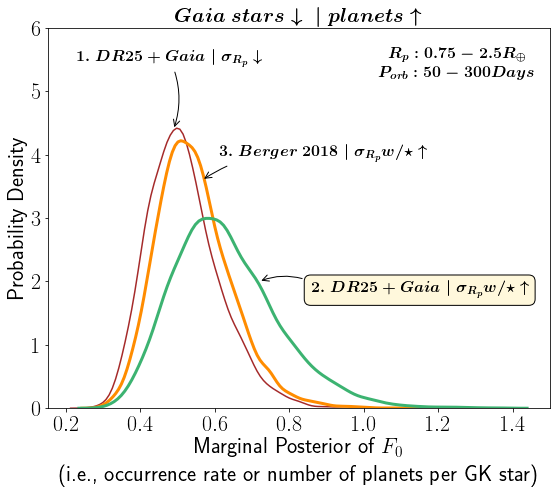

In [13]:
#GAIA with Berger and Huber catalog as well and Hsu and Ford. 


#Reorder key and produce results slides for figure.   
fig_GaiaBerger = pl.figure()
pl.rcParams["figure.figsize"] = (9,7)

#sns.kdeplot(np.exp(lnf0_DR25_NO_strl1_1_2_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\;planets\downarrow}$', color='darkgreen',ls=':')
#sns.kdeplot(np.exp(lnf0_DR25_NO_strl2_1_2_50_200), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\downarrow\;|\; stars\downarrow\;|\; planets\downarrow}$', color='black')
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl1_1_2_50_200), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  stars\uparrow\;|\;  planets\downarrow}$', color='blue',ls=':', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_1_2_50_200), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow\;|\; planets\downarrow}$', color='purple', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_NO_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\; planets\uparrow}$', color='darkorange',ls=':')

#pl.hist(np.exp(lnf0_DR25_NO_strl2_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='magenta')

#pl.hist(np.exp(lnf0_DR25_Gaia_NO_strl2_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='brown')
#pl.hist(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300), normed=True, bins=50, alpha=0.1, color='mediumseagreen')


#sns.kdeplot(np.exp(lnf0_DR25_NO_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\downarrow\;|\; planets\uparrow}$', color='magenta')

#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_0p75_2p5_50_300_hires_PorbandRp), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow\;|\; planets\uparrow}$ \,hires', color='lightblue', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow\;|\; planets\uparrow}$', color='cyan', linewidth=3)

#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{DR25 \;|\; \sigma_{R_{p}}\uparrow \;|\; stars\uparrow \;|\; planets\uparrow}$', color='red',ls=':', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_REAL_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\; \sigma_{R_{p}}\uparrow\;|\;  stars\downarrow\;|\;  planets\uparrow}$', color='cyan', linewidth=3)
sns.kdeplot(np.exp(lnf0_DR25_Gaia_NO_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}}\downarrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='brown')

##sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation), label=r'$\boldsymbol{Berger\;2018\;|\;  \sigma_{R_{p}} w/\star\uparrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='cyan', linewidth=3)
##sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched_fixed_truncation_Rp_True_is_constrained), label=r'$\boldsymbol{Berger\;2018\;|\;  \sigma_{R_{p}} w/\star\uparrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='magenta', linewidth=3)
sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched), label=r'$\boldsymbol{Berger\;2018\;|\;  \sigma_{R_{p}} w/\star\uparrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='darkorange', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_rematched), label=r'$\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}} w/\star\uparrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$\,Berger+2018 rematched', color='blue', linewidth=3)
#sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300_Berger_Huber_and_Custom), label=r'$\boldsymbol{Berger+Custom\;Gaia\;|\;  \sigma_{R_{p}} w/\star\uparrow\;|\; Gaia \; stars\downarrow\;|\; planets\uparrow}$', color='red', linewidth=3)

sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_RP_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25+Gaia\;|\;  \sigma_{R_{p}} w/\star\uparrow\;|\;  Gaia \;stars\downarrow\;|\; planets\uparrow}$', color='mediumseagreen', linewidth=3)
#sns.kdeplot(np.exp(lnf0_Q1Q16_NO_strl1_0p75_2p5_50_300), label=r'$\boldsymbol{Q1-Q16\;|\;  \sigma_{R_{p}}\downarrow\;|\;  stars\uparrow\;|\; planets\uparrow}$', color='dimgrey',ls=':')
#sns.kdeplot(Burke_2018_DR25_0p75_2p5_50_300, label=r'$\boldsymbol{Burke \, 2018\,  DR25\;|\; stars\downarrow\;|\; planets\uparrow}$', color='black')
#sns.kdeplot(np.exp(lnf0_DR25_Gaia_REAL_strl2_0p75_2p5_50_300), label=r'$\boldsymbol{DR25\;|\;  \sigma_{R_{p}}\uparrow\;|\;  Gaia stars\downarrow\;|\; planets\uparrow}$', color='darkkhaki')

pl.xlabel(r"\begin{center} Marginal Posterior of $F_{0}$ \\ (i.e., occurrence rate or number of planets per GK star) \end{center}", fontsize=22)    
pl.ylabel(r"Probability Density", fontsize=22)    
pl.title(r"$\boldsymbol{Gaia\;stars\downarrow\;|\; planets\uparrow}$", fontsize=20)
pl.legend(fontsize=16)
pl.tick_params(labelsize=22)
#pl.tick_params(axis='y',labelleft='off')
#pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.ylim([0, 6])
#pl.xlim([0,1.5])
ax = pl.subplot(111)
ax.legend().set_visible(False)
ann4 = ax.annotate(r"\begin{center} $\boldsymbol{1.\;DR25+Gaia\;|\;  \sigma_{R_{p}}\downarrow}$ \end{center}",
                  xy=(0.49, 4.4), xycoords='data',
                  xytext=(0.48, 5.5), textcoords='data',
                  size=16, va="center", ha="center",
                  arrowprops=dict(arrowstyle="->",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"), 
                  )
ann5 = ax.annotate(r"\begin{center} $\boldsymbol{3.\;Berger\;2018}$ $\boldsymbol{|}$ $\boldsymbol{\sigma_{R_{p}} w/\star\uparrow}$ \end{center}",
                  xy=(0.567, 3.6), xycoords='data',
                  xytext=(0.89,4.), textcoords='data',
                  size=16, va="center", ha="center",
                  arrowprops=dict(arrowstyle="->",
                                  connectionstyle="arc3,rad=0.2",
                                  fc="w"), 
                  )

props1 = dict(boxstyle='round,pad=0.4', facecolor='cornsilk')

ann6 = ax.annotate(r"\begin{center} $\boldsymbol{2.\;DR25+Gaia\;|\;  \sigma_{R_{p}} w/\star\uparrow}$ \end{center}",
                  xy=(0.72, 2.), xycoords='data',
                  xytext=(1.15, 2.), textcoords='data',
                  size=16, va="top", ha="center",
                  bbox=props1,
                  arrowprops=dict(arrowstyle="->",
                                  connectionstyle="arc3,rad=0.2",
                                  relpos=(0., 1.),
                                  fc="w"), 
                  )

                                    
style = dict(size=16, color='black')

ax.text(1.25, 5.5, r"\begin{center} $\boldsymbol{R_{p}: 0.75-2.5 R_{\oplus}}$ \end{center}", ha='center', **style)
ax.text(1.25, 5.2, r"\begin{center} $\boldsymbol{P_{orb}: 50-300 Days}$ \end{center}", ha='center', **style)


fig_GaiaBerger.savefig('/Users/meganshabram/Dropbox/NASA_Postdoctoral_Program_Fellowship/Gaia_Kepler_Occ_Rates/plots/plots_june_6_2018/Occ_Rate_kdeplot_DR25_strl2_and_stlr2BurkeCustom_0p75_2p5_50_300_ALL_Gaia_compBerger_Huber_fixed_truncation_2.pdf',bbox_inches='tight')
